In [1]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # To work with numerical data efficiently

In [2]:
# We Define most of our constants in this section
c = 299792458.0 #The Speed of Light in m/s
G = 6.67408e-11 # The Gravitional Constant in m3/(kg s^2)
M_sun = 1.9884754153381438e+30 # The mass of the sun in kg
f_0 = float(10) # An initial frequency of 10 Hz
m_1 = 1.14*M_sun # Mass of Object 1 in the Binary
m_2 = 1.14*M_sun # Mass of Object 2 in the Binary
omega_0 = 2*np.pi*f_0 # The inital angular frequency in rad/s
M = m_1 + m_2 # Total Mass of the Binarry System
f_LSO = (c**3)/((6**(3/2))*(np.pi)*(G*M)) 
# The frequency at which the two objects merge in Hz
omega_LSO = 2*np.pi*f_LSO 
# The angular frequency at which the two objects merge in rad/s

In [3]:
# We will use if statements to avoid the division by zero error
if M >0:
    v = (m_1*m_2)/(M**2) # Symmetric Mass
    M_chirp = (v**(3/5))*M # Chirp Mass
    if M_chirp >0:
        if omega_0>0:
            t_c = (5/256)*(((c**3)/(G*M_chirp))**(5/3))*((1/omega_0)**(8/3))
print(t_c)

222.33257317420131


In [4]:
t_LSO = (1 - (omega_0/omega_LSO)**(8/3))*t_c # Time at which the two objects merge
print(t_LSO)

222.3323941001129


In [5]:
def omega(t): 
    return omega_0*(1- (t/t_c))**(-3/8) 
# We defined the angular frequency as a function of t

In [6]:
def phi(t):
    return (-1/32)*((G*M_chirp*omega(t))/(c**3))**(-5/3) # We defined the orbital phase

In [7]:
r = 10**23 # Distancce of the Binary from earth in m

In [8]:
# Now we will define the plus polarization 
# for gravitional waves from a compact binary
a_plus = (2*G*M_chirp/(r*(c**2)))
def h_plus(i,t):
    return a_plus*((G*M_chirp*omega(t)/(c**3))**(2/3))*(1+np.cos(i)**2)*np.cos(2*phi(t))

In [9]:
# Now we will define the cross polarization 
# for gravitional waves from a compact binary
a_cross = (4*G*M_chirp/(r*(c**2)))
def h_cross(i,t):
    return a_cross*((G*M_chirp*omega(t)/(c**3))**(2/3))*np.cos(i)*np.sin(2*phi(t))

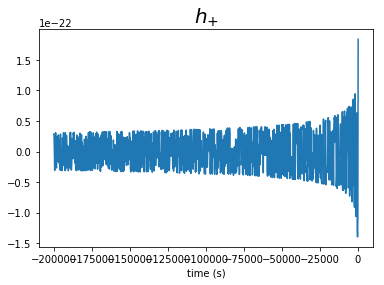

In [47]:
t = np.arange(-2e5, t_LSO, 200) # Time Domain
i = 45 # line of sight angle
# We compose the plot for the plus polarization
plt.figure(1)
plt.plot(t, h_plus(i,t))
plt.xlabel('time (s)')
plt.title(r'$h_\plus$', fontsize=20)
plt.show() #Stops Text from appearing above the plot

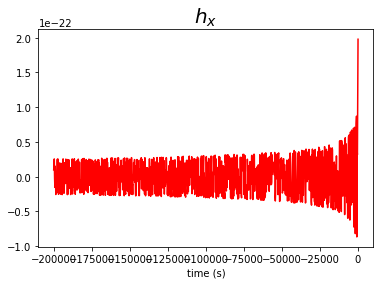

In [48]:
t = np.arange(-200000, t_LSO, 200) # Time Domain
i = 45 # line of sight angle
# We compose the plot for the cross polarization
plt.figure(1)
plt.plot(t, h_cross(i,t), 'r')
plt.xlabel('time (s)')
plt.title(r'$h_x$', fontsize=20)
plt.show() #Stops Text from appearing above the plot

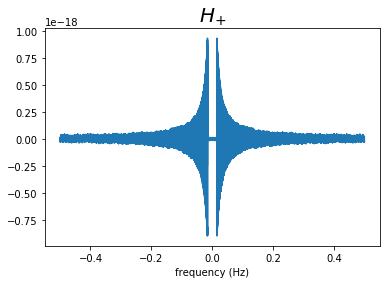

In [62]:
t = np.arange(-2e5, t_LSO, 0.01)  # Time Domain
H_plus = np.fft.fft(h_plus(i,t))   # Fast Fourier Transform of the plus polarization
freq = np.fft.fftfreq(t.shape[-1]) # Defines the Frequency domain
                                   # in terms of the Time Domain
# We compose the plot for the Fast Fourier Transform of the plus polarization
plt.plot(freq, H_plus.real)
plt.xlabel('frequency (Hz)')
plt.title(r'$H_\plus$', fontsize=20)
plt.show() #Stops Text from appearing above the plot

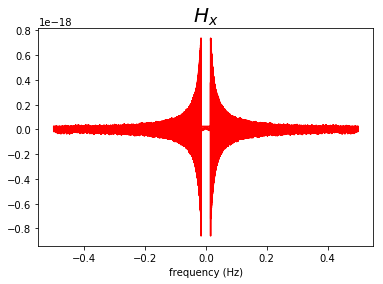

In [50]:
t = np.arange(-2e5, t_LSO, 0.01)  # Time Domain
H_cross = np.fft.fft(h_cross(i,t)) # Fast Fourier Transform of the cross polarization
freq = np.fft.fftfreq(t.shape[-1]) # Defines the Frequency
                                   # in terms of the Time Domain
# We compose the plot for the Fast Fourier Transform of the cross polarization
plt.plot(freq, H_cross.real, 'r')
plt.xlabel('frequency (Hz)')
plt.title(r'$H_x$', fontsize=20)
plt.show() #Stops Text from appearing above the plot

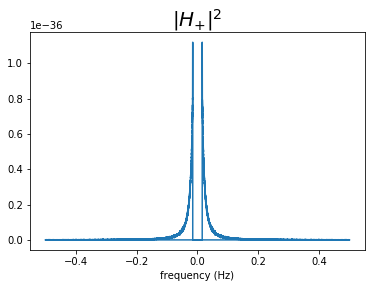

In [64]:
t = np.arange(-2e5, t_LSO, 0.01) # Time Domain
H_plus_sq = np.square(np.absolute(H_plus)) #Absolute Value of H_plus squared
freq = np.fft.fftfreq(t.shape[-1])
# We compose the plot for the Power Spectrum of the plus polarization
plt.plot(freq, H_plus_sq)
plt.xlabel('frequency (Hz)')
plt.title(r'$|H_\plus|^2$', fontsize=20)
plt.show() #Stops Text from appearing above the plot

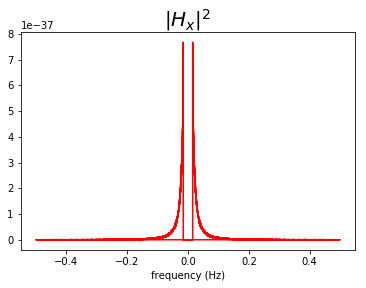

In [65]:
t = np.arange(-2e5, t_LSO, 0.01) # Time Domain
H_cross_sq = sq = np.square(np.absolute(H_cross))#Absolute Value of H_cross squared
freq = np.fft.fftfreq(t.shape[-1])
# We compose the plot for the Power Spectrum of cross polarization
plt.plot(freq, H_cross_sq, 'r')
plt.xlabel('frequency (Hz)')
plt.title(r'$|H_x|^2$', fontsize=20)
plt.show() #Stops Text from appearing above the plot